<a href="https://colab.research.google.com/github/suafle/useful_codes/blob/master/checking_bb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from matplotlib.colors import ListedColormap, BoundaryNorm

In [0]:
#Black-Body
def BB(wave,Teff):
  #wave must be in A
  c = 2.99792e8 #m s^-1
  h = 6.62618e-34 #J s
  k = 1.38066e-23 #J K^-1
  flambda_BB_SI = (2.*np.pi*h*c**2)/((wave*1e-10)**5)*(1./(np.exp(h*c/(wave*1e-10*k*Teff))-1)) # W m^-2 m^-1 (Flux at the surface)
  return flambda_BB_SI/1e10 #W m**-2 A**-1

#UBVRI passbands

#wavelength must be between 3000 and 4200 A (U)
#wavelength must be between 3600 and 5600 A (B)
#wavelength must be between 4700 and 7400 A (V)
#wavelength must be between 5500 and 9100 A (R)
#wavelength must be between 7000 and 9200 A (I)

def inter_U(wavelength): 
  U_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/UBVRI/U.txt'
  U = np.loadtxt(U_data)
  Uww = U[:,0] #A
  Ur = U[:,1]
  f = interp1d(Uww,Ur)
  return f(wavelength)
  
def inter_B(wavelength): 
  B_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/UBVRI/B.txt'
  B = np.loadtxt(B_data)
  Bww = B[:,0]
  Br = B[:,1]
  f = interp1d(Bww,Br)
  return f(wavelength)

def inter_V(wavelength): 
  V_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/UBVRI/V.txt'
  V = np.loadtxt(V_data)
  Vww = V[:,0]
  Vr = V[:,1]
  f = interp1d(Vww,Vr)
  return f(wavelength)

def inter_R(wavelength): 
  R_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/UBVRI/R.txt'
  R = np.loadtxt(R_data)
  Rww = R[:,0]
  Rr = R[:,1]
  f = interp1d(Rww,Rr)
  return f(wavelength)

def inter_I(wavelength): 
  I_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/UBVRI/I.txt'
  I = np.loadtxt(I_data)
  Iww = I[:,0]
  Ir = I[:,1]
  f = interp1d(Iww,Ir)
  return f(wavelength)

#2MASS passbands

def inter_j(wavelength): #wavelength must be in A in the range of 10620 and 14500 A
  mass_j = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/2MASS/2MASS_J.txt'
  tmass_j = np.loadtxt(mass_j)
  f = interp1d(tmass_j[:,0]*1e4,tmass_j[:,1])
  return f(wavelength)
  
def inter_h(wavelength): #wavelength must be in A in the range of 12890 and 19140 A
  mass_h = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/2MASS/2MASS_H.txt'
  tmass_h = np.loadtxt(mass_h)
  f = interp1d(tmass_h[:,0]*1e4,tmass_h[:,1])
  return f(wavelength)
  
def inter_ks(wavelength): #wavelength must be in A in the range of 19000 and 23990 A
  mass_ks = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/2MASS/2MASS_Ks.txt'
  tmass_ks = np.loadtxt(mass_ks)
  f = interp1d(tmass_ks[:,0]*1e4,tmass_ks[:,1])
  return f(wavelength)

#GAIA passbands

def inter_g(wavelength): 
  gaia_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/GAIADR2/GaiaDR2_RevisedPassbands.dat'
  gaia = np.loadtxt(gaia_data)
  gaia = np.where(gaia==99.99,0,gaia)
  gaia_w = gaia[:,0]*10 #Angstrom
  gaia_g = gaia[:,1]
  f = interp1d(gaia_w,gaia_g)
  return f(wavelength)
  
def inter_gbp(wavelength): 
  gaia_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/GAIADR2/GaiaDR2_RevisedPassbands.dat'
  gaia = np.loadtxt(gaia_data)
  gaia = np.where(gaia==99.99,0,gaia)
  gaia_w = gaia[:,0]*10 #Angstrom
  gaia_bp = gaia[:,3]
  f = interp1d(gaia_w,gaia_bp)
  return f(wavelength)
  
def inter_grp(wavelength): 
  gaia_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/GAIADR2/GaiaDR2_RevisedPassbands.dat'
  gaia = np.loadtxt(gaia_data)
  gaia = np.where(gaia==99.99,0,gaia)
  gaia_w = gaia[:,0]*10 #Angstrom
  gaia_rp = gaia[:,5]
  f = interp1d(gaia_w,gaia_rp)
  return f(wavelength)

#WISE passbands

#wavelength must be between 25300 and 65000 A (W1)
#wavelength must be between 25300 and 80000 A (W1)
#wavelength must be between 25300 and 285000 A (W1)
#wavelength must be between 25300 and 285000 A (W1)

def inter_w1(wavelength): 
  wise1_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/WISE/RSR-W1.txt'
  w1 = np.loadtxt(wise1_data)
  w1ww = w1[:,0]*1e4
  w1r = w1[:,1]
  f = interp1d(w1ww,w1r)
  return f(wavelength)
  
def inter_w2(wavelength): 
  wise2_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/WISE/RSR-W2.txt'
  w2 = np.loadtxt(wise2_data)
  w2ww = w2[:,0]*1e4
  w2r = w2[:,1]
  f = interp1d(w2ww,w2r)
  return f(wavelength)

def inter_w3(wavelength): 
  wise3_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/WISE/RSR-W3.txt'
  w3 = np.loadtxt(wise3_data)
  w3ww = w3[:,0]*1e4
  w3r = w3[:,1]
  f = interp1d(w3ww,w3r)
  return f(wavelength)

def inter_w4(wavelength): 
  wise4_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/WISE/RSR-W4.txt'
  w4 = np.loadtxt(wise4_data)
  w4ww = w4[:,0]*1e4
  w4r = w4[:,1]
  f = interp1d(w4ww,w4r)
  return f(wavelength)

def mag_ab(Teff,Lbol): 
  Mpc = 3.0856e22 #m
  c = 2.99792e8 #m s^-1
  cA = c*1e10 #A s**-1
  h = 6.62618e-34 #J s
  k = 1.38066e-23 #J K^-1
  pc = 3.0857e16 #m
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  delta_wave = 100 #Å
  wave_vector = np.arange(3000,3e7,delta_wave) #Check the graph above (also in A)
  d = 10 #pc, to account for absolute magnitudes
  
  #Generate black body spectrum in f_lambda units
  #-----------------------------------------
  flambda_BB_SI = (2.*np.pi*h*c**2)/((wave_vector*1e-10)**5)*(1./(np.exp(h*c/(wave_vector*1e-10*k*Teff))-1)) # W m^-2 m^-1 (Flux at the surface)
  flambda_BB_SI = flambda_BB_SI/1e7 # erg s**-1 cm**-2 A**-1
  R = np.sqrt(Lbol*Lsun/(4.*np.pi*sigma_SB*Teff**4)) # m Source radius (considering we know Lbol and Teff)
  flux = flambda_BB_SI*(R/(d*pc))**2 #Flux from the source at 10 pc
  
  #AB magnitude
  fgaia = interp1d(wave_vector,flux)
  
  #################
  #UBVRI magnitude#
  #################
  
  #wavelength must be between 3000 and 4200 A (U)
  #wavelength must be between 3600 and 5600 A (B)
  #wavelength must be between 4700 and 7400 A (V)
  #wavelength must be between 5500 and 9100 A (R)
  #wavelength must be between 7000 and 9200 A (I)
  ww = np.arange(3000,4200,0.1)
  f = np.trapz(fgaia(ww) * inter_U(ww) * ww, x=ww) / np.trapz(inter_U(ww) * cA / ww, x=ww)
  u =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(3600,5600,0.1)
  f = np.trapz(fgaia(ww) * inter_B(ww) * ww, x=ww) / np.trapz(inter_B(ww) * cA / ww, x=ww)
  b =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(4700,7400,0.1)
  f = np.trapz(fgaia(ww) * inter_V(ww) * ww, x=ww) / np.trapz(inter_V(ww) * cA / ww, x=ww)
  v =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(5500,9100,0.1)
  f = np.trapz(fgaia(ww) * inter_R(ww) * ww, x=ww) / np.trapz(inter_R(ww) * cA / ww, x=ww)
  r =  -2.5 * np.log10(f) - 48.60
  
  #################
  #2MASS magnitude#
  #################
  
  ww = np.arange(10620,14500,1)
  f = np.trapz(fgaia(ww) * inter_j(ww) * ww, x=ww) / np.trapz(inter_j(ww) * cA / ww, x=ww)
  j =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(12890,19140,1)
  f = np.trapz(fgaia(ww) * inter_h(ww) * ww, x=ww) / np.trapz(inter_h(ww) * cA / ww, x=ww)
  h =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(19000,23990,1)
  f = np.trapz(fgaia(ww) * inter_ks(ww) * ww, x=ww) / np.trapz(inter_ks(ww) * cA / ww, x=ww)
  ks =  -2.5 * np.log10(f) - 48.60
  
  
  ################
  #GAIA magnitude#
  ################
  
  ww = np.arange(3000,11000,1)
  f = np.trapz(fgaia(ww) * inter_g(ww) * ww, x=ww) / np.trapz(inter_g(ww) * cA / ww, x=ww)
  g =  -2.5 * np.log10(f) - 48.60
  
  f = np.trapz(fgaia(ww) * inter_gbp(ww) * ww, x=ww) / np.trapz(inter_gbp(ww) * cA / ww, x=ww)
  gbp =  -2.5 * np.log10(f) - 48.60
  
  f = np.trapz(fgaia(ww) * inter_grp(ww) * ww, x=ww) / np.trapz(inter_grp(ww) * cA / ww, x=ww)
  grp =  -2.5 * np.log10(f) - 48.60
  ww = np.arange(7000,9200,0.1)
  f = np.trapz(fgaia(ww) * inter_I(ww) * ww, x=ww) / np.trapz(inter_I(ww) * cA / ww, x=ww)
  i =  -2.5 * np.log10(f) - 48.60
  
  ################
  #WISE magnitude#
  ################
  
  #wavelength must be between 25300 and 65000 A (W1)
  #wavelength must be between 25300 and 80000 A (W1)
  #wavelength must be between 25300 and 285000 A (W1)
  #wavelength must be between 25300 and 285000 A (W1)
  
  ww = np.arange(25300,65000,1)
  f = np.trapz(fgaia(ww) * inter_w1(ww) * ww, x=ww) / np.trapz(inter_w1(ww) * cA / ww, x=ww)
  w1 =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(25300,80000,1)
  f = np.trapz(fgaia(ww) * inter_w2(ww) * ww, x=ww) / np.trapz(inter_w2(ww) * cA / ww, x=ww)
  w2 =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(25300,285000,1)
  f = np.trapz(fgaia(ww) * inter_w3(ww) * ww, x=ww) / np.trapz(inter_w3(ww) * cA / ww, x=ww)
  w3 =  -2.5 * np.log10(f) - 48.60
  
  f = np.trapz(fgaia(ww) * inter_w4(ww) * ww, x=ww) / np.trapz(inter_w4(ww) * cA / ww, x=ww)
  w4 =  -2.5 * np.log10(f) - 48.60
  
  #U,B,V,R,I,J,H,Ks,G,Gbp,Grp,W1,W2,W3,W4 #15 bands
  #Effective wavelengths in A
  #U = 3571
  #B = 4344
  #V = 5456
  #R = 6442
  #I = 7994
  #J = 12355
  #H = 16458
  #Ks =	21603
  #G = 6730
  #GBP = 5320
  #GRP = 7970
  #W1 = 3.4e4
  #W2 = 4.6e4
  #W3 = 12e4
  #W4 = 22e4
  
  return u,b,v,r,i,j,h,ks,g,gbp,grp,w1,w2,w3,w4


def mag_vega(Teff,Lbol):
  
  #Normal bands
  #mab - mvega = C -> mvega = mab - C  where C is the offset
  u_ab,b_ab,v_ab,r_ab,i_ab,j_ab,h_ab,ks_ab,g_ab,gbp_ab,grp_ab,w1_ab,w2_ab,w3_ab,w4_ab = mag_ab(Teff,Lbol)
  
  u = u_ab - 0.79
  b = b_ab + 0.09
  v = v_ab - 0.02
  r = r_ab - 0.21
  i = i_ab - 0.45
  
  j = j_ab - 0.91
  h = h_ab - 1.39
  ks = ks_ab - 1.85
  
  w1 = w1_ab - 2.699
  w2 = w2_ab - 3.339
  w3 = w3_ab - 5.174
  w4 = w4_ab - 6.620
  
  #Gaia bands
  #Mvega = M_AB - ZP_AB + ZP_veg
  g = g_ab - 25.7915509947 + 25.6914396869
  gbp = gbp_ab - 25.3861560855 + 25.3488107670
  grp = grp_ab - 25.1161664528 +  24.7626744847
  
  return u,b,v,r,i,j,h,ks,g,gbp,grp,w1,w2,w3,w4

def spec_mag_ab(wv,lum): #lum is the specific luminosity in W A**-1 and wv is the wavelength in A
  
  
  c = 2.99792e8 #m s^-1
  cm = c*1e6 #microns s**-1
  cA = c*1e10 #A s**-1
  #I need erg s**-1 cm**-2 A**-1
  lum = lum*1e7 # erg s**-1 A**-1 #1e7 to change from W to erg/s
  flux = lum/(4*np.pi*(10*3.08e18)**2) #Flux at 10 pc
  fgaia = interp1d(wv,flux)
  
  #################
  #UBVRI magnitude#
  #################
  
  #wavelength must be between 3000 and 4200 A (U)
  #wavelength must be between 3600 and 5600 A (B)
  #wavelength must be between 4700 and 7400 A (V)
  #wavelength must be between 5500 and 9100 A (R)
  #wavelength must be between 7000 and 9200 A (I)
  
  ww = np.arange(3000,4200,0.1)
  f = np.trapz(fgaia(ww) * inter_U(ww) * ww, x=ww) / np.trapz(inter_U(ww) * cA / ww, x=ww)
  u =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(3600,5600,0.1)
  f = np.trapz(fgaia(ww) * inter_B(ww) * ww, x=ww) / np.trapz(inter_B(ww) * cA / ww, x=ww)
  b =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(4700,7400,0.1)
  f = np.trapz(fgaia(ww) * inter_V(ww) * ww, x=ww) / np.trapz(inter_V(ww) * cA / ww, x=ww)
  v =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(5500,9100,0.1)
  f = np.trapz(fgaia(ww) * inter_R(ww) * ww, x=ww) / np.trapz(inter_R(ww) * cA / ww, x=ww)
  r =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(7000,9200,0.1)
  f = np.trapz(fgaia(ww) * inter_I(ww) * ww, x=ww) / np.trapz(inter_I(ww) * cA / ww, x=ww)
  i =  -2.5 * np.log10(f) - 48.60
  
  #################
  #2MASS magnitude#
  #################
  
  ww = np.arange(10620,14500,1)
  f = np.trapz(fgaia(ww) * inter_j(ww) * ww, x=ww) / np.trapz(inter_j(ww) * cA / ww, x=ww)
  j =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(12890,19140,1)
  f = np.trapz(fgaia(ww) * inter_h(ww) * ww, x=ww) / np.trapz(inter_h(ww) * cA / ww, x=ww)
  h =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(19000,23990,1)
  f = np.trapz(fgaia(ww) * inter_ks(ww) * ww, x=ww) / np.trapz(inter_ks(ww) * cA / ww, x=ww)
  ks =  -2.5 * np.log10(f) - 48.60
  
  
  ################
  #GAIA magnitude#
  ################
  
  ww = np.arange(3000,11000,1)
  f = np.trapz(fgaia(ww) * inter_g(ww) * ww, x=ww) / np.trapz(inter_g(ww) * cA / ww, x=ww)
  g =  -2.5 * np.log10(f) - 48.60
  
  f = np.trapz(fgaia(ww) * inter_gbp(ww) * ww, x=ww) / np.trapz(inter_gbp(ww) * cA / ww, x=ww)
  gbp =  -2.5 * np.log10(f) - 48.60
  
  f = np.trapz(fgaia(ww) * inter_grp(ww) * ww, x=ww) / np.trapz(inter_grp(ww) * cA / ww, x=ww)
  grp =  -2.5 * np.log10(f) - 48.60
  
  
  ################
  #WISE magnitude#
  ################
  
  #wavelength must be between 25300 and 65000 A (W1)
  #wavelength must be between 25300 and 80000 A (W1)
  #wavelength must be between 25300 and 285000 A (W1)
  #wavelength must be between 25300 and 285000 A (W1)
  
  ww = np.arange(25300,65000,1)
  f = np.trapz(fgaia(ww) * inter_w1(ww) * ww, x=ww) / np.trapz(inter_w1(ww) * cA / ww, x=ww)
  w1 =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(25300,80000,1)
  f = np.trapz(fgaia(ww) * inter_w2(ww) * ww, x=ww) / np.trapz(inter_w2(ww) * cA / ww, x=ww)
  w2 =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(25300,285000,1)
  f = np.trapz(fgaia(ww) * inter_w3(ww) * ww, x=ww) / np.trapz(inter_w3(ww) * cA / ww, x=ww)
  w3 =  -2.5 * np.log10(f) - 48.60
  
  f = np.trapz(fgaia(ww) * inter_w4(ww) * ww, x=ww) / np.trapz(inter_w4(ww) * cA / ww, x=ww)
  w4 =  -2.5 * np.log10(f) - 48.60
 
  #U,B,V,R,I,J,H,Ks,G,Gbp,Grp,W1,W2,W3,W4 #15 bands
  #Effective wavelengths in A
  #U = 3571
  #B = 4344
  #V = 5456
  #R = 6442
  #I = 7994
  #J = 12355
  #H = 16458
  #Ks =	21603
  #G = 6730
  #GBP = 5320
  #GRP = 7970
  #W1 = 3.4e4
  #W2 = 4.6e4
  #W3 = 12e4
  #W4 = 22e4
  
  return u,b,v,r,i,j,h,ks,g,gbp,grp,w1,w2,w3,w4
  
def spec_mag_vega(wv,flux):
  
  c = 2.99792e8 #m s^-1
  cm = c*1e6 #microns s**-1
  cA = c*1e10 #A s**-1

  #Normal bands
  #mab - mvega = C -> mvega = mab - C  where C is the offset
  u_ab,b_ab,v_ab,r_ab,i_ab,j_ab,h_ab,ks_ab,g_ab,gbp_ab,grp_ab,w1_ab,w2_ab,w3_ab,w4_ab = spec_mag_ab(wv,flux)
  
  u = u_ab - 0.79
  b = b_ab + 0.09
  v = v_ab - 0.02
  r = r_ab - 0.21
  i = i_ab - 0.45
  
  j = j_ab - 0.91
  h = h_ab - 1.39
  ks = ks_ab - 1.85
  
  w1 = w1_ab - 2.699
  w2 = w2_ab - 3.339
  w3 = w3_ab - 5.174
  w4 = w4_ab - 6.620
  
  #Gaia bands
  #Mvega = M_AB - ZP_AB + ZP_veg
  g = g_ab - 25.7915509947 + 25.6914396869
  gbp = gbp_ab - 25.3861560855 + 25.3488107670
  grp = grp_ab - 25.1161664528 +  24.7626744847
  
  return u,b,v,r,i,j,h,ks,g,gbp,grp,w1,w2,w3,w4

In [0]:
#Parsec models
#Including everything
#Synthetic models

#Column orden UBV
#Zini MH logAge Mini int_IMF Mass logL logTe logg label       0-9
#McoreTP C_O period0 period1 pmode Mloss tau1m X Y Xc         10-19
#Xn Xo Cexcess Z mbolmag Umag Bmag Vmag Rmag Imag             20-29
#Jmag Hmag Kmag                                               30-32

#Column order GAIA
#Zini MH logAge Mini int_IMF Mass logL logTe logg label       0-9
#McoreTP C_O period0 period1 pmode Mloss tau1m X Y Xc         10-19
#Xn Xo Cexcess Z mbolmag Gmag G_BPbrmag G_BPftmag G_RPmag     20-28

#Column order WISE
#Zini MH logAge Mini int_IMF Mass logL logTe logg label       0-9
#McoreTP C_O period0 period1 pmode Mloss tau1m X Y Xc         10-19
#Xn Xo Cexcess Z mbolmag Jmag Hmag Ksmag IRAC_3.6mag IRAC_4.5mag   20 - 29
#IRAC_5.8mag IRAC_8.0mag MIPS_24mag MIPS_70mag MIPS_160mag W1mag W2mag W3mag W4mag    30 - 38

#The IMF does not matter that much
file1 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/UBV(1e5).txt'
file2 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/GAIA(1e5).txt'
file3 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/WISE(1e5).txt'
file4 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/UBV(1e6).txt'
file5 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/GAIA(1e6).txt'
file6 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/WISE(1e6).txt'
file7 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/UBV(1e7).txt'
file8 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/GAIA(1e7).txt'
file9 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/WISE(1e7).txt'
file10 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/UBV(1e8).txt'
file11 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/GAIA(1e8).txt'
file12 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/WISE(1e8).txt'
file13 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/UBV(1e9).txt'
file14 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/GAIA(1e9).txt'
file15 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/WISE(1e9).txt'
file16 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/UBV(1e10).txt'
file17 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/GAIA(1e10).txt'
file18 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/WISE(1e10).txt'

data1 = np.loadtxt(file1)
data2 = np.loadtxt(file2)
data3 = np.loadtxt(file3)
data4 = np.loadtxt(file4)
data5 = np.loadtxt(file5)
data6 = np.loadtxt(file6)
data7 = np.loadtxt(file7)
data8 = np.loadtxt(file8)
data9 = np.loadtxt(file9)
data10 = np.loadtxt(file10)
data11 = np.loadtxt(file11)
data12 = np.loadtxt(file12)
data13 = np.loadtxt(file13)
data14 = np.loadtxt(file14)
data15 = np.loadtxt(file15)
data16 = np.loadtxt(file16)
data17 = np.loadtxt(file17)
data18 = np.loadtxt(file18)

T1 = data1[:,7][:-1]
U1 = data1[:,25][:-1]
B1 = data1[:,26][:-1]
V1 = data1[:,27][:-1]
R1 = data1[:,28][:-1]
I1 = data1[:,29][:-1]
G1 = data2[:,25][:-1]
J1 = data3[:,25][:-1]
H1 = data3[:,26][:-1]
K1 = data3[:,27][:-1]
W1_1 = data3[:,35][:-1]
W2_1 = data3[:,36][:-1]
W3_1 = data3[:,37][:-1]
W4_1 = data3[:,38][:-1]

label1 = data1[:,9][:-1]

T2 = np.array(data4[:,7][:-1])
U2 = np.array(data4[:,25][:-1])
B2 = np.array(data4[:,26][:-1])
V2 = np.array(data4[:,27][:-1])
R2 = np.array(data4[:,28][:-1])
I2 = np.array(data4[:,29][:-1])
G2 = np.array(data5[:,25][:-1])
J2 = np.array(data6[:,25][:-1])
H2 = np.array(data6[:,26][:-1])
K2 = np.array(data6[:,27][:-1])
W1_2 = np.array(data6[:,35][:-1])
W2_2 = np.array(data6[:,36][:-1])
W3_2 = np.array(data6[:,37][:-1])
W4_2 = np.array(data6[:,38][:-1])

label2 = data4[:,9][:-1]

L3 = data7[:,6][:-1]
T3 = data7[:,7][:-1]
U3 = data7[:,25][:-1]
B3 = data7[:,26][:-1]
V3 = data7[:,27][:-1]
R3 = data7[:,28][:-1]
I3 = data7[:,29][:-1]
G3 = data8[:,25][:-1]
J3 = data9[:,25][:-1]
H3 = data9[:,26][:-1]
K3 = data9[:,27][:-1]
W1_3 = data9[:,35][:-1]
W2_3 = data9[:,36][:-1]
W3_3 = data9[:,37][:-1]
W4_3 = data9[:,38][:-1]

label3 = data7[:,9][:-1]

L4 = data10[:,6][:-1]
T4 = data10[:,7][:-1]
U4 = data10[:,25][:-1]
B4 = data10[:,26][:-1]
V4 = data10[:,27][:-1]
R4 = data10[:,28][:-1]
I4 = data10[:,29][:-1]
G4 = data11[:,25][:-1]
J4 = data12[:,25][:-1]
H4 = data12[:,26][:-1]
K4 = data12[:,27][:-1]
W1_4 = data12[:,35][:-1]
W2_4 = data12[:,36][:-1]
W3_4 = data12[:,37][:-1]
W4_4 = data12[:,38][:-1]

label4 = data10[:,9][:-1]

T5 = data13[:,7][:-1]
U5 = data13[:,25][:-1]
B5 = data13[:,26][:-1]
V5 = data13[:,27][:-1]
R5 = data13[:,28][:-1]
I5 = data13[:,29][:-1]
G5 = data14[:,25][:-1]
J5 = data15[:,25][:-1]
H5 = data15[:,26][:-1]
K5 = data15[:,27][:-1]
W1_5 = data15[:,35][:-1]
W2_5 = data15[:,36][:-1]
W3_5 = data15[:,37][:-1]
W4_5 = data15[:,38][:-1]

label5 = data13[:,9][:-1]

T6 = data16[:,7][:-1]
U6 = data16[:,25][:-1]
B6 = data16[:,26][:-1]
V6 = data16[:,27][:-1]
R6 = data16[:,28][:-1]
I6 = data16[:,29][:-1]
G6 = data17[:,25][:-1]
J6 = data18[:,25][:-1]
H6 = data18[:,26][:-1]
K6 = data18[:,27][:-1]
W1_6 = data18[:,35][:-1]
W2_6 = data18[:,36][:-1]
W3_6 = data18[:,37][:-1]
W4_6 = data18[:,38][:-1]

label6 = data16[:,9][:-1]

label1 = np.where(label1==3, 2, label1)
label1 = np.where(label1==4, 3, label1) 
label1 = np.where(label1==5, 3, label1) 
label1 = np.where(label1==6, 3, label1) 
label1 = np.where(label1==7, 4, label1) 
label1 = np.where(label1==8, 4, label1) 
label1 = np.where(label1==9, 5, label1) 

label2 = np.where(label2==3, 2, label2)
label2 = np.where(label2==4, 3, label2) 
label2 = np.where(label2==5, 3, label2) 
label2 = np.where(label2==6, 3, label2) 
label2 = np.where(label2==7, 4, label2) 
label2 = np.where(label2==8, 4, label2) 
label2 = np.where(label2==9, 5, label2) 

label3 = np.where(label3==3, 2, label3)
label3 = np.where(label3==4, 3, label3) 
label3 = np.where(label3==5, 3, label3) 
label3 = np.where(label3==6, 3, label3) 
label3 = np.where(label3==7, 4, label3) 
label3 = np.where(label3==8, 4, label3) 
label3 = np.where(label3==9, 5, label3) 

label4 = np.where(label4==3, 2, label4)
label4 = np.where(label4==4, 3, label4) 
label4 = np.where(label4==5, 3, label4) 
label4 = np.where(label4==6, 3, label4) 
label4 = np.where(label4==7, 4, label4) 
label4 = np.where(label4==8, 4, label4) 
label4 = np.where(label4==9, 5, label4) 

label5 = np.where(label5==3, 2, label5)
label5 = np.where(label5==4, 3, label5) 
label5 = np.where(label5==5, 3, label5) 
label5 = np.where(label5==6, 3, label5) 
label5 = np.where(label5==7, 4, label5) 
label5 = np.where(label5==8, 4, label5) 
label5 = np.where(label5==9, 5, label5) 

label6 = np.where(label6==3, 2, label6)
label6 = np.where(label6==4, 3, label6) 
label6 = np.where(label6==5, 3, label6) 
label6 = np.where(label6==6, 3, label6) 
label6 = np.where(label6==7, 4, label6) 
label6 = np.where(label6==8, 4, label6) 
label6 = np.where(label6==9, 5, label6) 

In [0]:
pos_ms = np.where(label4==1)

L4 = L4[pos_ms[0]]
T4 = T4[pos_ms[0]]
U4 = U4[pos_ms[0]]
B4 = B4[pos_ms[0]]
V4 = V4[pos_ms[0]]
R4 = R4[pos_ms[0]]
I4 = I4[pos_ms[0]]
G4 = G4[pos_ms[0]]
J4 = J4[pos_ms[0]]
H4 = H4[pos_ms[0]]
K4 = K4[pos_ms[0]]
W1_4 = W1_4[pos_ms[0]]
W2_4 = W2_4[pos_ms[0]]
W3_4 = W3_4[pos_ms[0]]
W4_4 = W4_4[pos_ms[0]]

0


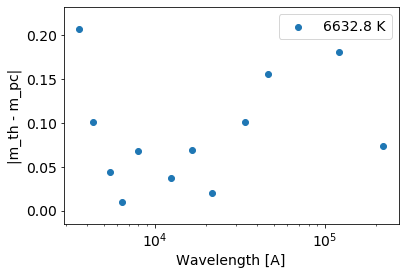

1


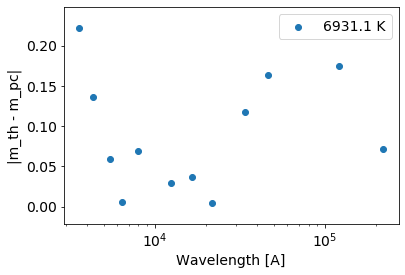

2


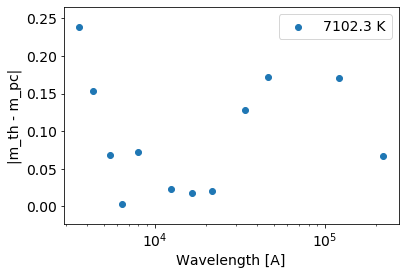

3


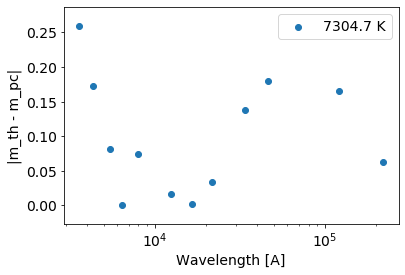

4


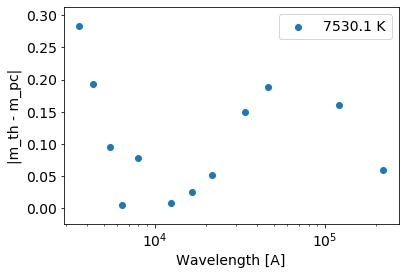

5


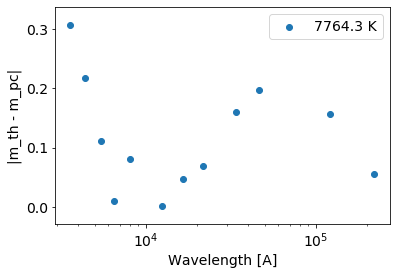

6


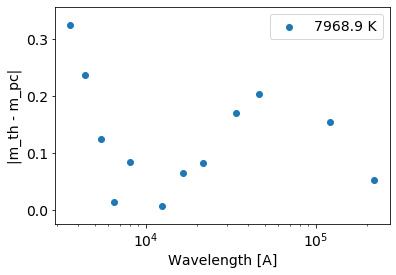

7


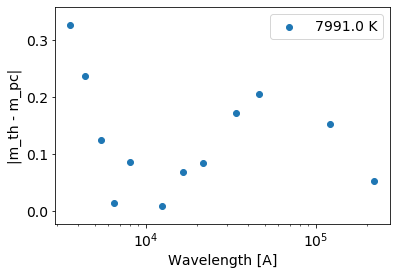

8


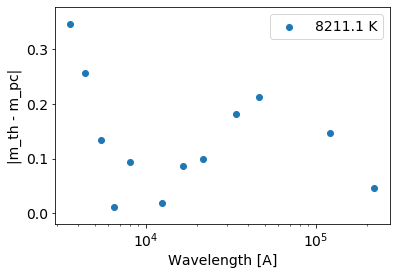

9


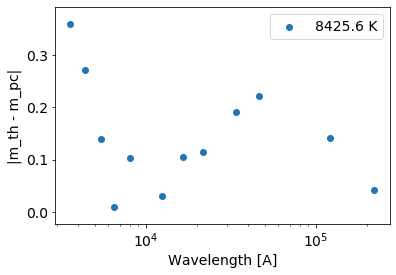

10


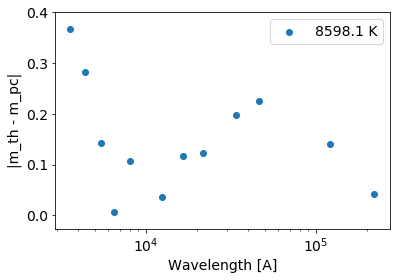

11


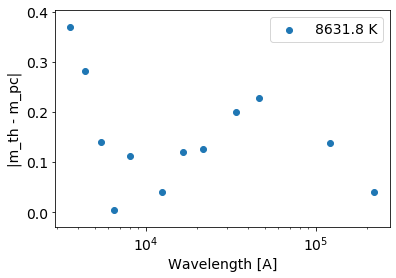

12


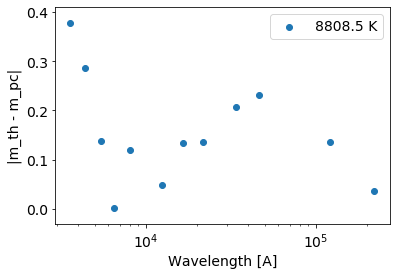

13


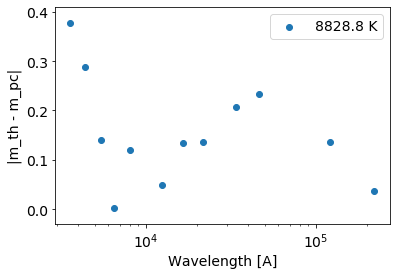

14


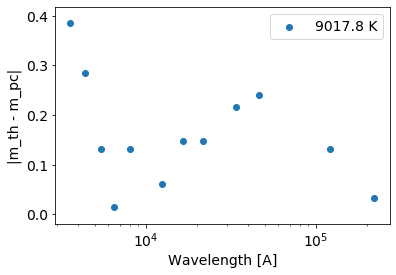

15


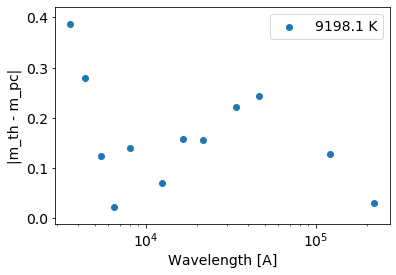

16


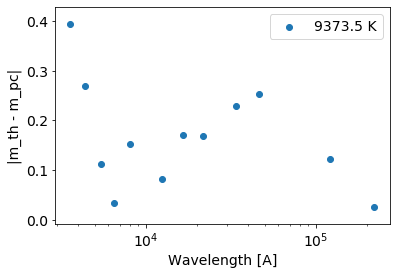

17


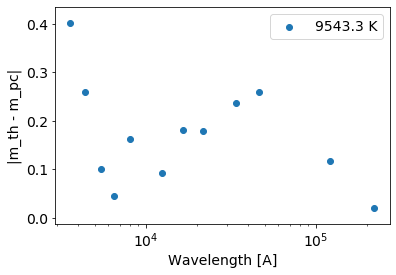

18


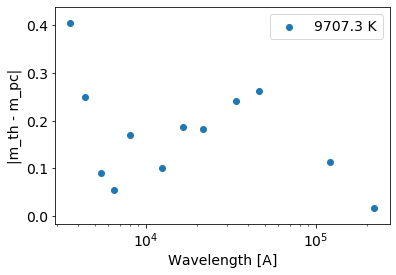

19


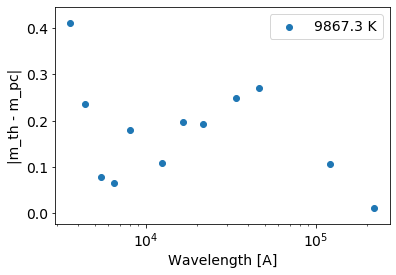

20


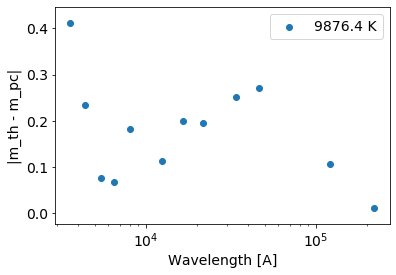

21


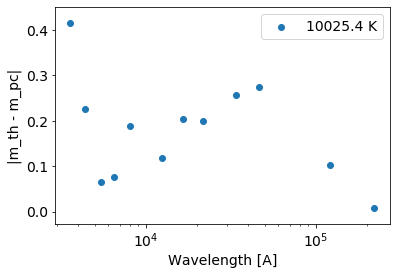

22


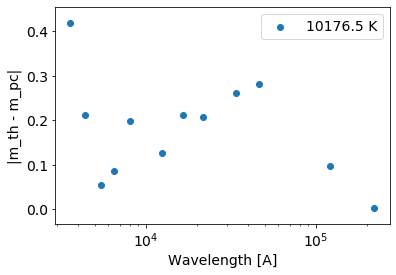

23


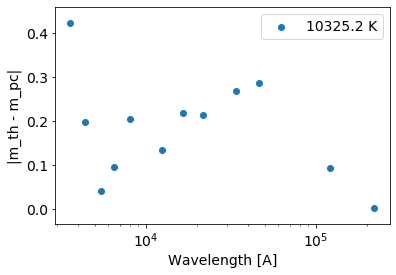

24


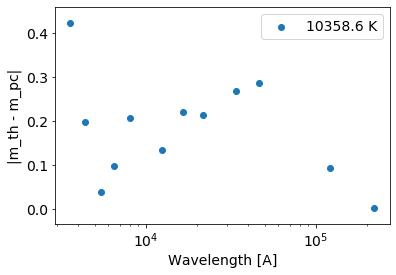

25


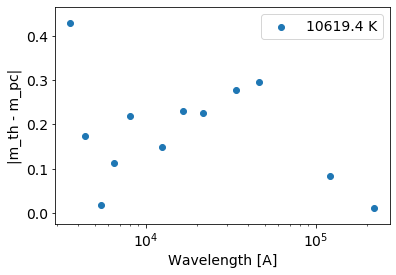

26


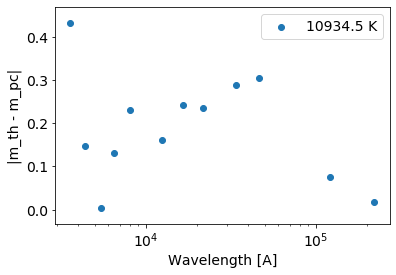

27


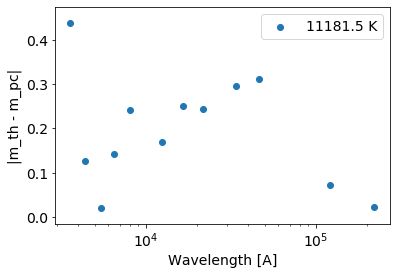

28


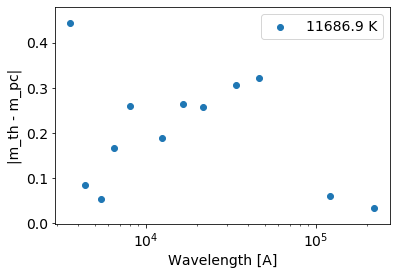

29


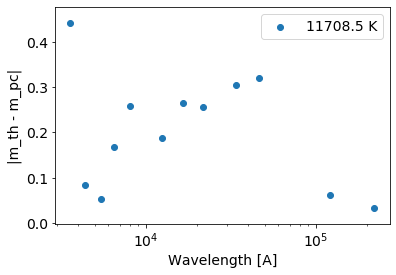

30


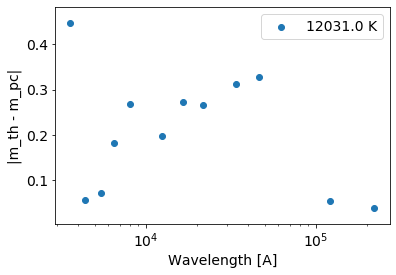

31


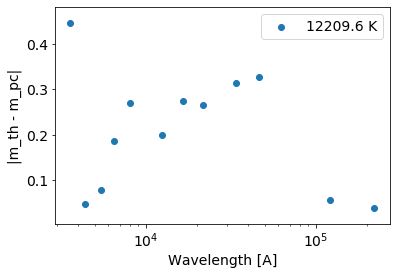

32


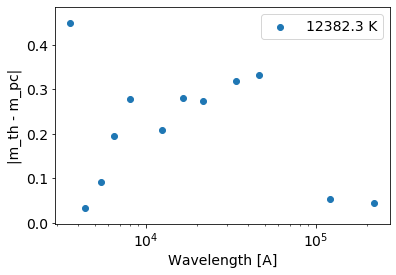

33


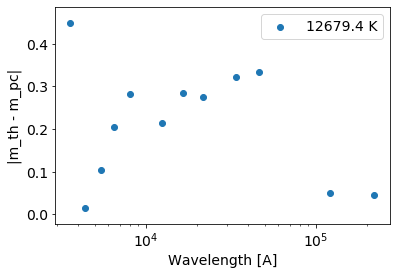

34


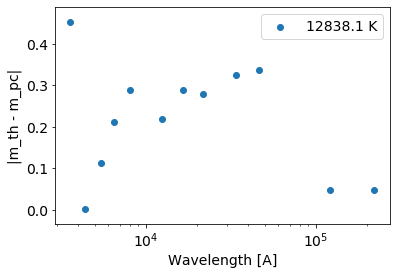

35


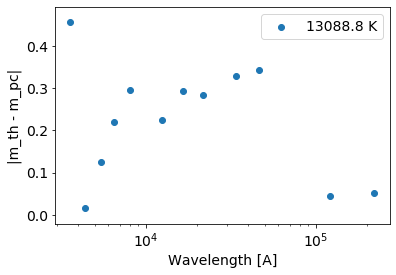

36


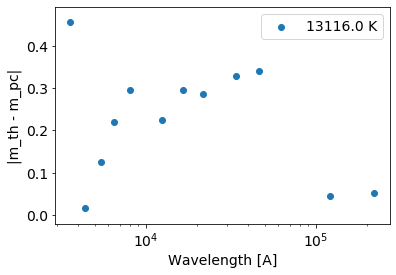

37


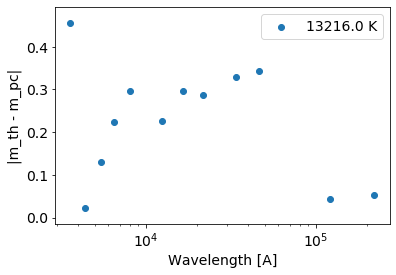

38


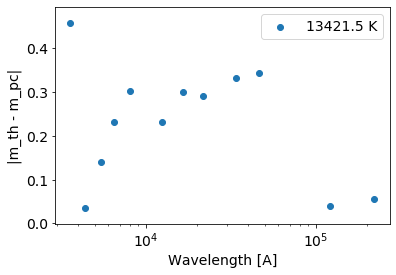

39


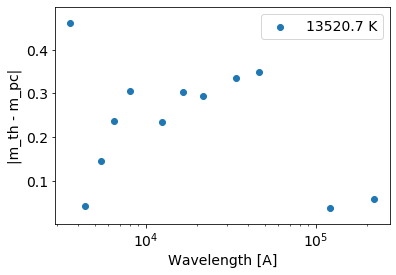

40


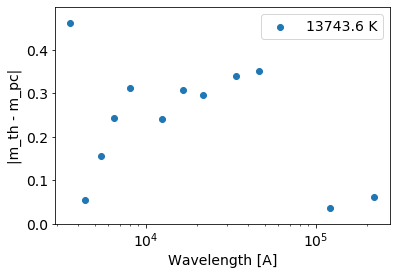

41


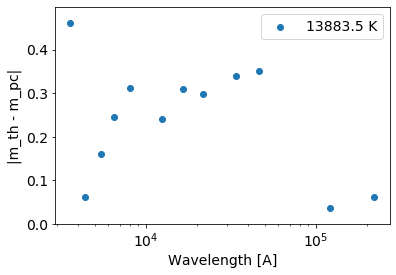

42


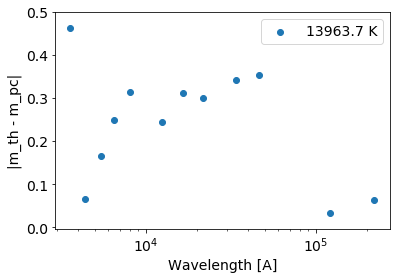

43


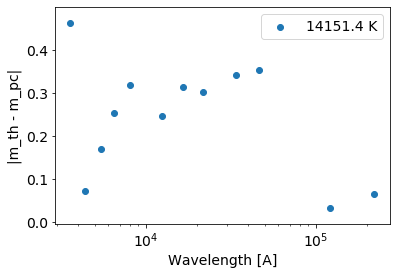

44


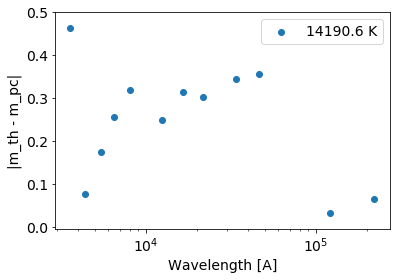

45


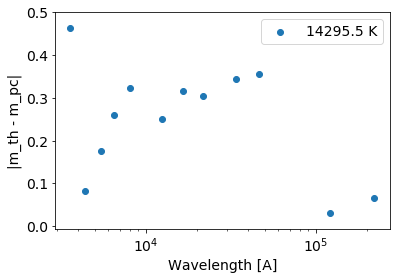

46


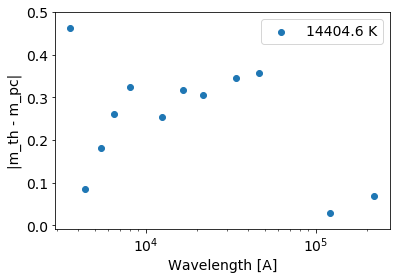

47


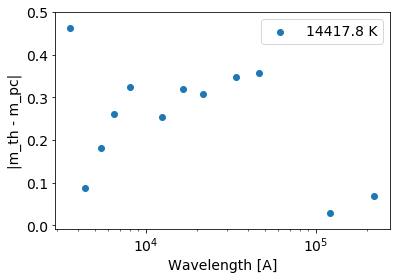

48


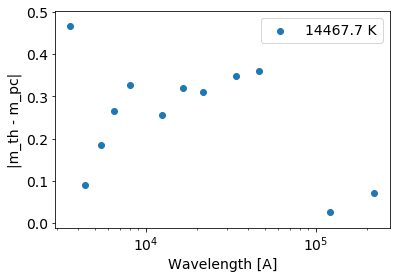

49


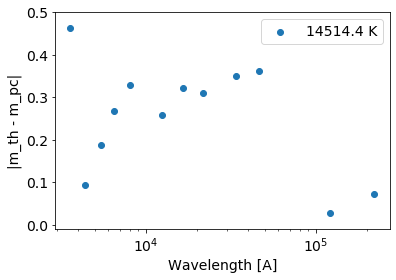

50


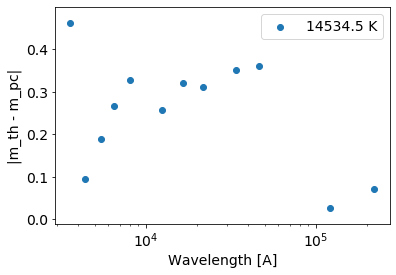

51


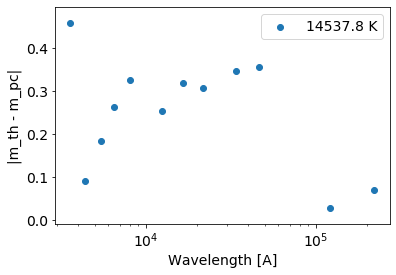

52


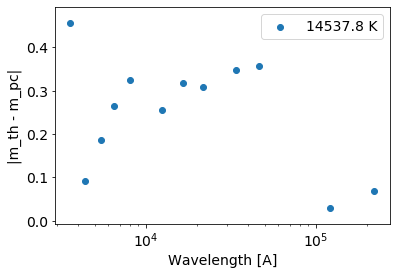

53


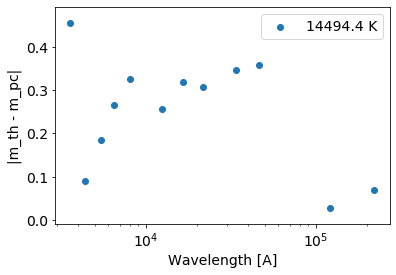

54


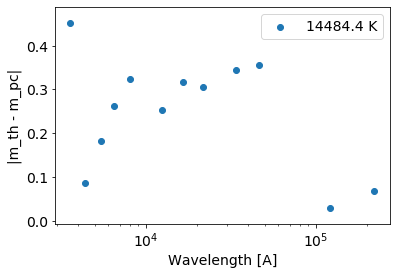

55


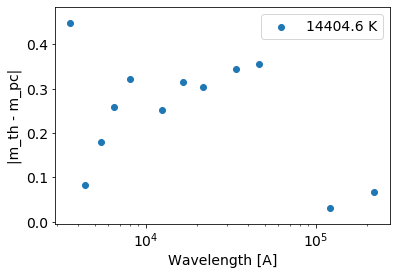

56


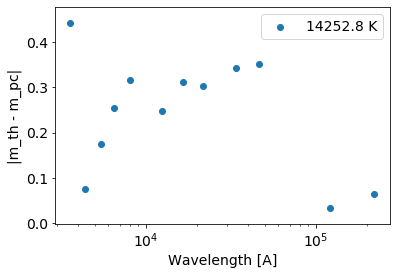

57


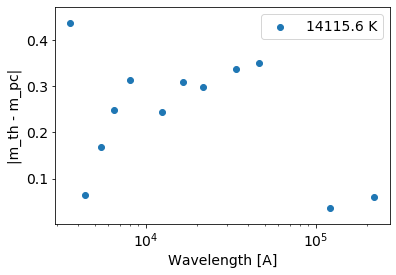

58


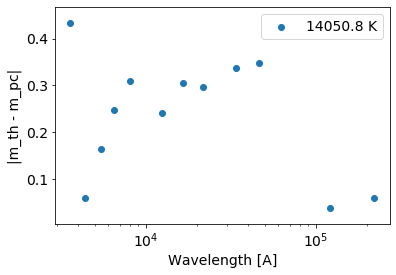

59


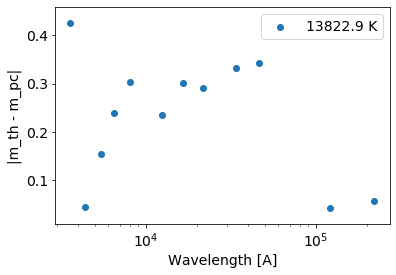

60


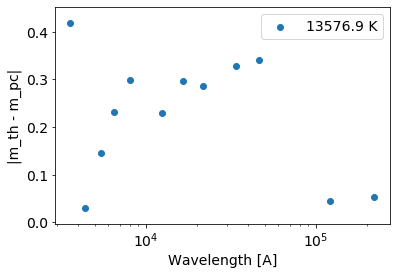

61


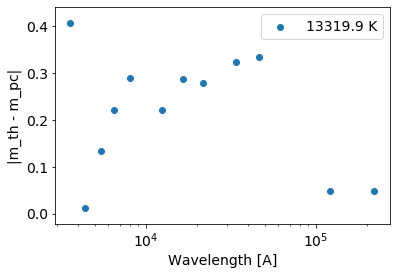

62


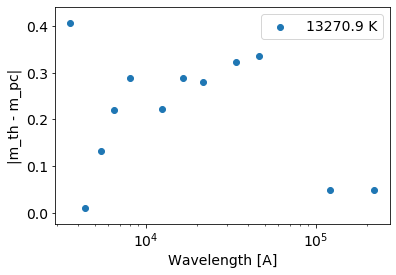

63


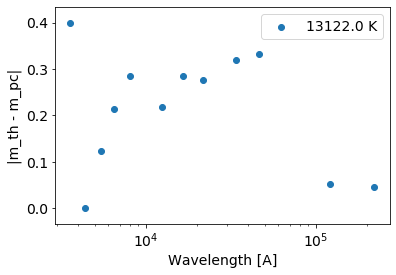

64


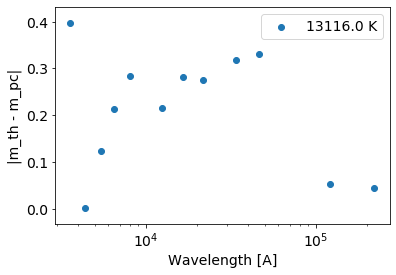

65


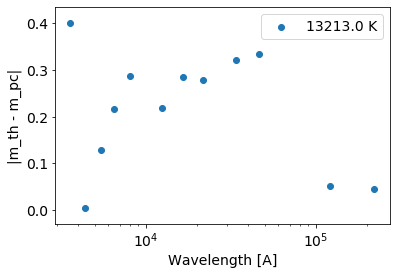

66


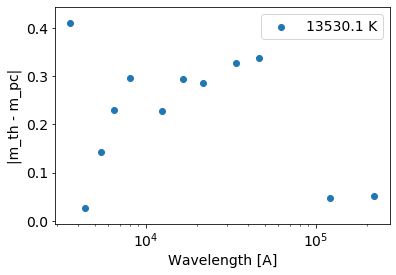

67


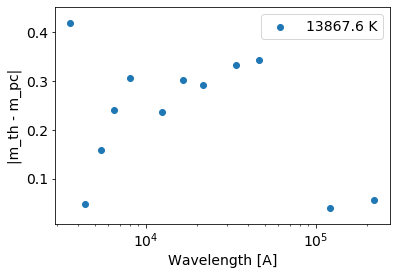

68


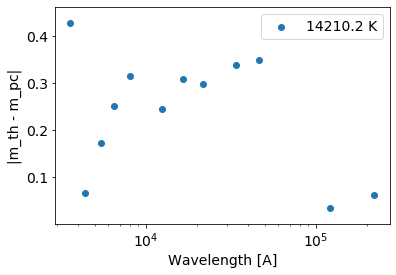

69


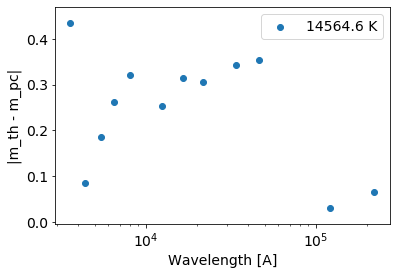

70


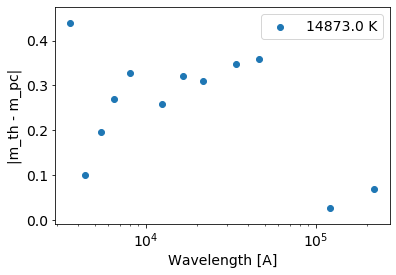

71


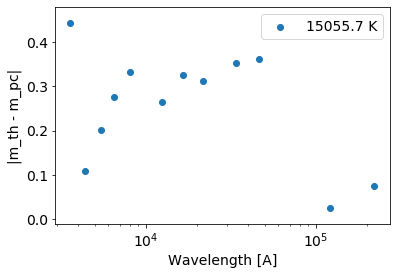

In [5]:
matplotlib.rcParams.update({'font.size': 14})

for a in range(0,len(T4)):
  
  waves = [3571,4344,5456,6442,7994,12355,16458,21603,3.4e4,4.6e4,12e4,22e4]
  u,b,v,r,i,j,h,ks,g,gbp,grp,w1,w2,w3,w4 = mag_vega(10.0**T4[a],10.0**L4[a])
 
  print(a)

  du = U4[a] - u
  db = B4[a] - b
  dv = V4[a] - v
  dr = R4[a] - r
  di = I4[a] - i
  dj = J4[a] - j
  dh = H4[a] - h
  dk = K4[a] - ks
  dw1 = W1_4[a] - w1
  dw2 = W2_4[a] - w2
  dw3 = W3_4[a] - w3
  dw4 = W4_4[a] - w4
  #print(U3[a]-u)
  #print(B3[a]-b)
  #print(V3[a]-v)
  #print(R3[a]-r)
  #print(I3[a]-i)
  #print(J3[a]-j)
  #print(H3[a]-h)
  #print(K3[a]-ks)
  #print(G3[a]-g)
  #print(W1_3[a]-w1)
  #print(W2_3[a]-w2)
  #print(W3_3[a]-w3)
  #print(W4_3[a]-w4)

  plt.scatter(waves,np.abs([du,db,dv,dr,di,dj,dh,dk,dw1,dw2,dw3,dw4]),label=str(round(10**T4[a],1))+' K')
  plt.legend()
  #plt.yscale('log')
  plt.xscale('log')
  plt.xlabel('Wavelength [A]')
  plt.ylabel('|m_th - m_pc|')
  plt.show()
  plt.close()
#print(label3)

In [0]:
#Comparing with other codes
from astropy import units as un
from astropy.constants import sigma_sb
from astropy.modeling.blackbody import blackbody_lambda, blackbody_nu

In [7]:
"""
wl = np.arange(100,5e5,10)*un.AA
B_lam = blackbody_lambda(wl,5000*un.K) #This is just planck!!! (Intensity)

#I need erg s**-1 cm**-2 A**-1

for a in range(0,len(T3)):
  
  waves = [3571,4344,5456,6442,7994,12355,16458,21603,3.4e4,4.6e4,12e4,22e4]
  R = np.sqrt(((10**L3[a])*un.L_sun) / (sigma_sb*4*np.pi*(un.K*10**T3[a])**4))
  R = R.to(un.pc)
  B_lam = blackbody_lambda(wl,un.K*10**(T3[a]))
  
  u,b,v,r,i,j,h,ks,g,gbp,grp,w1,w2,w3,w4 = spec_mag_vega(wl,np.pi*un.sr*B_lam*(R/10*un.pc)**2)
 
  print(a)

  du = U3[a] - u
  db = B3[a] - b
  dv = V3[a] - v
  dr = R3[a] - r
  di = I3[a] - i
  dj = J3[a] - j
  dh = H3[a] - h
  dk = K3[a] - ks
  dw1 = W1_3[a] - w1
  dw2 = W2_3[a] - w2
  dw3 = W3_3[a] - w3
  dw4 = W4_3[a] - w4

  plt.scatter(waves,np.abs([du,db,dv,dr,di,dj,dh,dk,dw1,dw2,dw3,dw4]))
  plt.yscale('log')
  plt.xscale('log')
  plt.show()
  plt.close()
"""

"\nwl = np.arange(100,5e5,10)*un.AA\nB_lam = blackbody_lambda(wl,5000*un.K) #This is just planck!!! (Intensity)\n\n#I need erg s**-1 cm**-2 A**-1\n\nfor a in range(0,len(T3)):\n  \n  waves = [3571,4344,5456,6442,7994,12355,16458,21603,3.4e4,4.6e4,12e4,22e4]\n  R = np.sqrt(((10**L3[a])*un.L_sun) / (sigma_sb*4*np.pi*(un.K*10**T3[a])**4))\n  R = R.to(un.pc)\n  B_lam = blackbody_lambda(wl,un.K*10**(T3[a]))\n  \n  u,b,v,r,i,j,h,ks,g,gbp,grp,w1,w2,w3,w4 = spec_mag_vega(wl,np.pi*un.sr*B_lam*(R/10*un.pc)**2)\n \n  print(a)\n\n  du = U3[a] - u\n  db = B3[a] - b\n  dv = V3[a] - v\n  dr = R3[a] - r\n  di = I3[a] - i\n  dj = J3[a] - j\n  dh = H3[a] - h\n  dk = K3[a] - ks\n  dw1 = W1_3[a] - w1\n  dw2 = W2_3[a] - w2\n  dw3 = W3_3[a] - w3\n  dw4 = W4_3[a] - w4\n\n  plt.scatter(waves,np.abs([du,db,dv,dr,di,dj,dh,dk,dw1,dw2,dw3,dw4]))\n  plt.yscale('log')\n  plt.xscale('log')\n  plt.show()\n  plt.close()\n"